In [1]:
import pandas as pd
import sys
import os

# Add the parent directory to path so we can import from 'src'
sys.path.append(os.path.abspath('..'))

from src.feature_engineering import AirbnbEngineer

In [2]:
df = pd.read_csv('../data/listings_processed.csv')

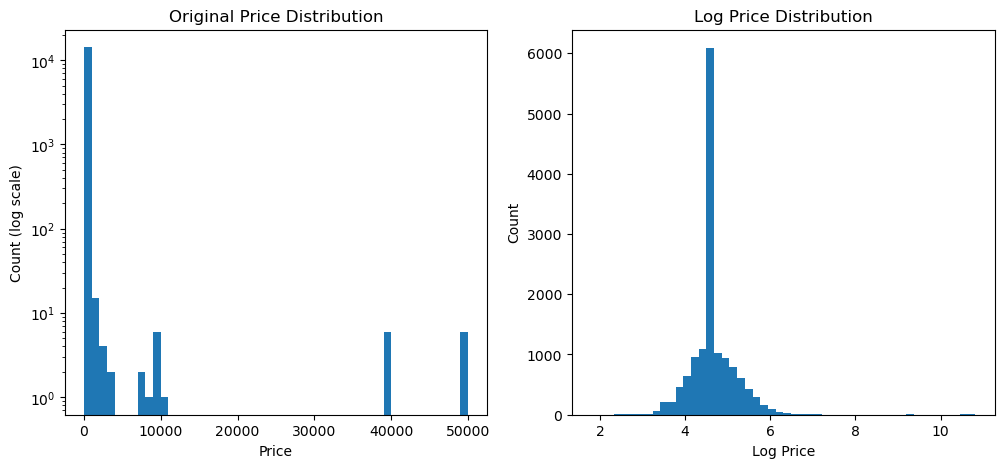

In [3]:
engineer = AirbnbEngineer(df)

engineer.plot_price_distribution()

In [4]:
engineer.transform()

Data encoded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14274 entries, 0 to 14273
Columns: 108 entries, host_response_time to full_neighbourhood
dtypes: bool(1), float64(90), int32(2), int64(12), object(3)
memory usage: 11.6+ MB
None


In [5]:
X_train, X_test, y_train, y_test = engineer.split_dataset()

X_train, X_test = engineer.target_encode_neighbourhood(X_train, X_test, y_train)

X_train, X_test = engineer.scale_numeric_features(X_train, X_test)

Train data prepared.


In [6]:
X_train.to_csv('../data/X_train.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

os.makedirs('../models', exist_ok=True)
engineer.save_preprocessor('../models/engineer.pkl')

print("Data and Preprocessor saved successfully.")

Data and Preprocessor saved successfully.
